# Project 2 Loan Prediction Dataset Playground
## Ryan Rosiak
## 10/4/21

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the data and view it
lp_df = pd.read_csv('./Dataset/loan-train.csv', header=0)
lp_df.head(25)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
# Shape of the data
lp_df.shape

(614, 13)

In [4]:
# Attributes
lp_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# Description of dataset
lp_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# Number of unique values per column
for col in lp_df.columns:
    print(col, ':', lp_df[col].nunique())

Loan_ID : 614
Gender : 2
Married : 2
Dependents : 4
Education : 2
Self_Employed : 2
ApplicantIncome : 505
CoapplicantIncome : 287
LoanAmount : 203
Loan_Amount_Term : 10
Credit_History : 2
Property_Area : 3
Loan_Status : 2


In [7]:
# Check how many NAN values are in each column
lp_df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# CLEANING DATA
# Fix up some of the data to be of the correct decimal place
# First fix the loan amount in thousands
lp_df['LoanAmount'] = lp_df['LoanAmount'] * 1000
# Replace the NAN values in each column
lp_df['Gender'] = lp_df['Gender'].fillna('Not Specified')
lp_df['Married'] = lp_df['Married'].fillna('Not Specified')
lp_df['Dependents'] = lp_df['Dependents'].fillna(0)
lp_df['Self_Employed'] = lp_df['Self_Employed'].fillna('No')
lp_df['LoanAmount'] = lp_df['LoanAmount'].fillna(0)
lp_df['Loan_Amount_Term'] = lp_df['Loan_Amount_Term'].fillna('Not Specified')
lp_df['Credit_History'] = lp_df['Credit_History'].fillna(-1)
lp_df.head(25)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0.0,360,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,360,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,360,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,360,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141000.0,360,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267000.0,360,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95000.0,360,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158000.0,360,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168000.0,360,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349000.0,360,1.0,Semiurban,N


## Preliminary Question 1
## Does marital status determine the range of money that you are applying for?

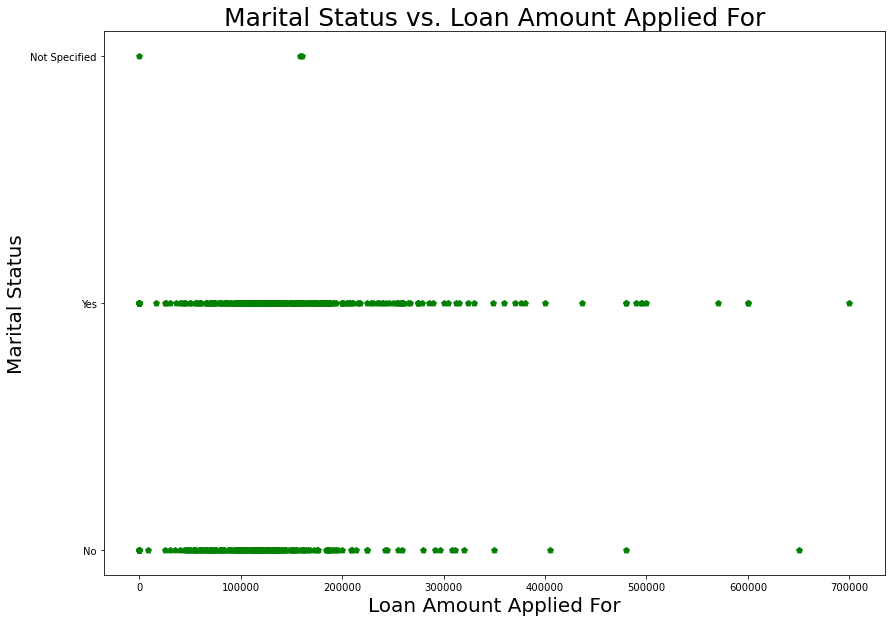

In [14]:
sub_lp_df = lp_df[['Married', 'LoanAmount']]

plt.figure(figsize=(14,10))
plt.scatter(sub_lp_df['LoanAmount'], sub_lp_df['Married'], c='green', marker='p')
plt.title('Marital Status vs. Loan Amount Applied For', fontsize=25)
plt.xlabel('Loan Amount Applied For', fontsize=20)
plt.ylabel('Marital Status', fontsize=20)
plt.show()

## Preliminary Question 2
## Does education status determine a successful credit history check?

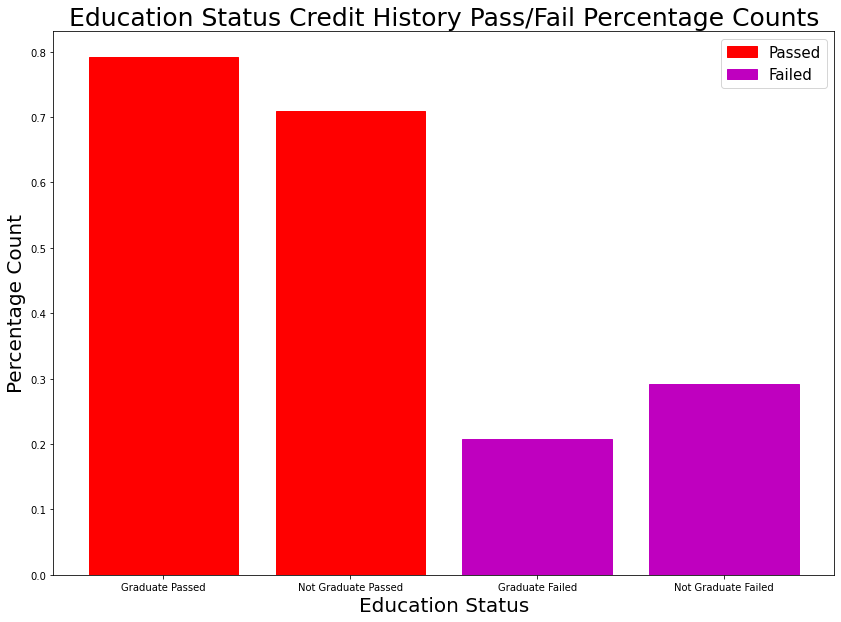

In [41]:
sub_lp_df = lp_df[['Education', 'Credit_History']]
graduate_total_passed_percentage = sub_lp_df.loc[(sub_lp_df['Education'] == 'Graduate') & (sub_lp_df['Credit_History'] == 1.0)].count() / sub_lp_df.loc[sub_lp_df['Education'] == 'Graduate'].count()
non_graduate_total_passed_percentage = sub_lp_df.loc[(sub_lp_df['Education'] == 'Not Graduate') & (sub_lp_df['Credit_History'] == 1.0)].count() / sub_lp_df.loc[sub_lp_df['Education'] == 'Not Graduate'].count()
graduate_total_failed_percentage = 1 - graduate_total_passed_percentage
non_graduate_total_failed_percentage = 1 - non_graduate_total_passed_percentage

plt.figure(figsize=(14,10))
barlist1 = plt.bar(['Graduate Passed', 'Not Graduate Passed'], [graduate_total_passed_percentage[0], non_graduate_total_passed_percentage[0]])
barlist2 = plt.bar(['Graduate Failed', 'Not Graduate Failed'], [graduate_total_failed_percentage[0], non_graduate_total_failed_percentage[0]])
barlist1[0].set_color('r')
barlist1[1].set_color('r')
barlist2[0].set_color('m')
barlist2[1].set_color('m')
plt.title('Education Status Credit History Pass/Fail Percentage Counts', fontsize=25)
plt.xlabel('Education Status', fontsize=20)
plt.ylabel('Percentage Count', fontsize=20)
plt.legend(['Passed', 'Failed'], fontsize=15)
plt.show()

## Preliminary Question 3
## Does applicant income determine loan amount applied for?

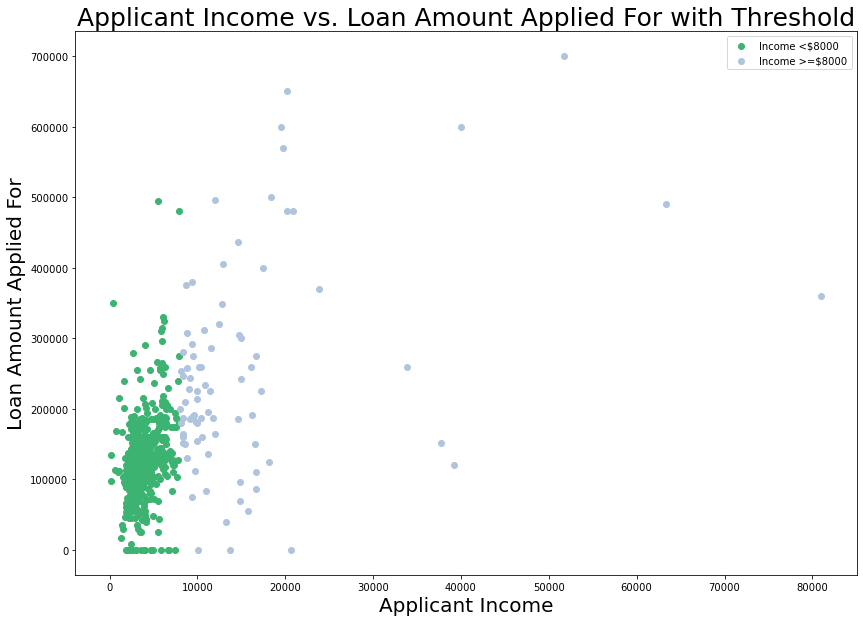

In [48]:
sub_lp_df = lp_df[['ApplicantIncome', 'LoanAmount']]
threshold = 8000
applicant_income_loan_amount_less_than_threshold = sub_lp_df.loc[sub_lp_df['ApplicantIncome'] < threshold]
applicant_income_loan_amount_greater_than_threshold = sub_lp_df.loc[sub_lp_df['ApplicantIncome'] >= threshold]
plt.figure(figsize=(14,10))
plt.scatter(applicant_income_loan_amount_less_than_threshold['ApplicantIncome'], applicant_income_loan_amount_less_than_threshold['LoanAmount'], c='mediumseagreen')
plt.scatter(applicant_income_loan_amount_greater_than_threshold['ApplicantIncome'], applicant_income_loan_amount_greater_than_threshold['LoanAmount'], c='lightsteelblue')
plt.title('Applicant Income vs. Loan Amount Applied For with Threshold', fontsize=25)
plt.xlabel('Applicant Income', fontsize=20)
plt.ylabel('Loan Amount Applied For', fontsize=20)
plt.legend(['Income <$8000', 'Income >=$8000'])
plt.show()

## Preliminary Question 4
## Does property area affect loan status?

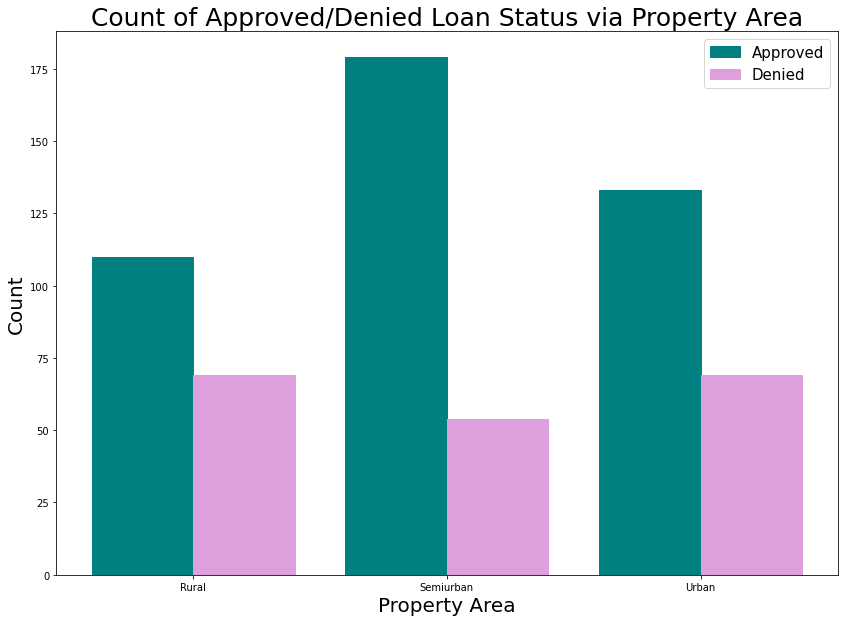

In [64]:
sub_lp_df = lp_df[['Property_Area', 'Loan_Status']]
property_area_approved = sub_lp_df.loc[sub_lp_df['Loan_Status'] == 'Y'].groupby(by='Property_Area').count()
property_area_denied = sub_lp_df.loc[sub_lp_df['Loan_Status'] == 'N'].groupby(by='Property_Area').count()
rural_approved, semiurban_approved, urban_approved = property_area_approved['Loan_Status']
rural_denied, semiurban_denied, urban_denied = property_area_denied['Loan_Status']

plt.figure(figsize=(14,10))
barlist1 = plt.bar(['Rural Approved', 'Semiurban Approved', 'Urban Approved'], [rural_approved, semiurban_approved, urban_approved], width=0.4)
barlist2 = plt.bar([0.4, 1.4, 2.4], [rural_denied, semiurban_denied, urban_denied], width=0.4)
list(map(lambda bar: bar.set_color('teal'), barlist1))
list(map(lambda bar: bar.set_color('plum'), barlist2))
plt.xticks(np.arange(0, 3, 1.0) + 0.4 / 2, ['Rural', 'Semiurban', 'Urban'])
plt.title('Count of Approved/Denied Loan Status via Property Area', fontsize=25)
plt.xlabel('Property Area', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.legend(['Approved', 'Denied'], fontsize=15)
plt.show()

## Preliminary Question 5
## Is there a correlation between loan amount and loan amount term?

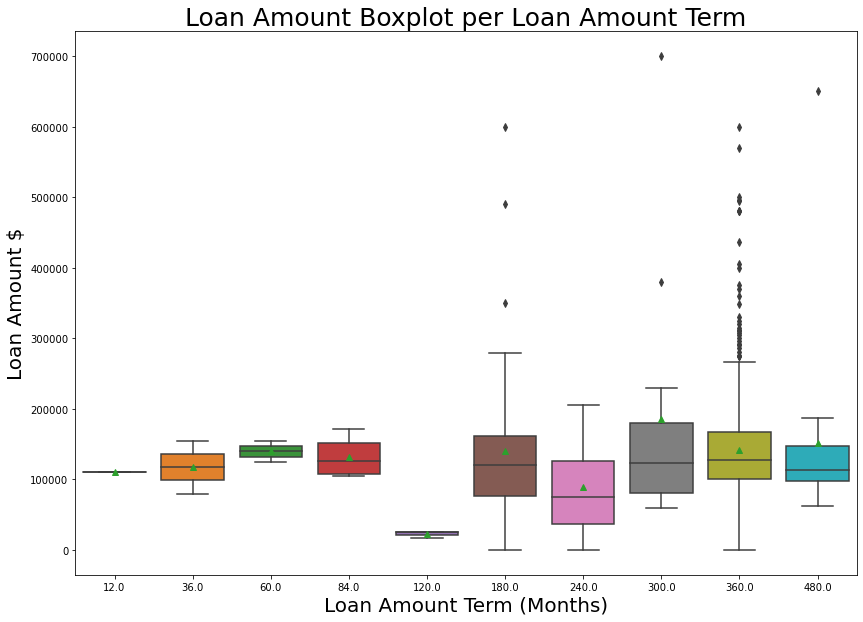

In [78]:
sub_lp_df = lp_df[['LoanAmount', 'Loan_Amount_Term']]
# Get rid of the non specified loan amount terms
sub_lp_df = sub_lp_df.loc[sub_lp_df['Loan_Amount_Term'] != 'Not Specified']

unique_loan_amount_terms = sub_lp_df['Loan_Amount_Term'].unique()
unique_loan_amount_terms.sort()
loan_amount_term_data_series = []
for loan_amount_term in unique_loan_amount_terms:
    loan_amount_term_data_series.append(sub_lp_df.loc[sub_lp_df['Loan_Amount_Term'] == loan_amount_term]['LoanAmount'])

plt.figure(figsize=(14,10))
ax = sns.boxplot(data=loan_amount_term_data_series, showmeans=True)
plt.title('Loan Amount Boxplot per Loan Amount Term', fontsize=25)
plt.xlabel('Loan Amount Term (Months)', fontsize=20)
plt.ylabel('Loan Amount $', fontsize=20)
ax.set_xticklabels(unique_loan_amount_terms)
plt.show()